# Linear Regression Example

### 使用TensorFlow实现线性回归.



### 导包

In [87]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style="darkgrid")
from sklearn.linear_model import LinearRegression
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


### 定义训练次数learning_epochs，梯度下降的学习率learning_rate  
### 显示打印数据的步幅display_step

### 生成训练数据
![](1.jpg)

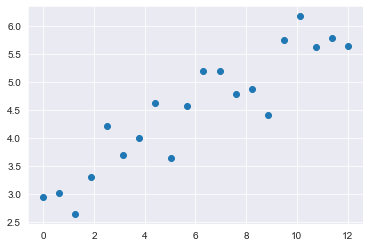

In [88]:
x_train=np.linspace(0,12,20).reshape(-1,1)
y_train=np.linspace(3,6,20)+np.random.randn(20)*0.4
plt.scatter(x_train,y_train)

### 使用之前所学线性回归预测回归函数

In [89]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [91]:
display(lr.coef_,lr.intercept_)

array([0.25738627])

2.955097162372123

In [ ]:
# f(x)=X*w+b

### 定义TensorFlow参数：X，Y，W，b

In [92]:
x_train.shape

(20, 1)

In [93]:
#X是数据 y是观测值
X=tf.compat.v1.placeholder(dtype=tf.float32,shape=[20,1])
y=tf.compat.v1.placeholder(dtype=tf.float32,shape=[20])
w=tf.Variable(initial_value=tf.random.normal(shape=[1,1]))
b=tf.Variable(initial_value=tf.random.normal(shape=[1]))

In [94]:
tf.matmul(X,w)

<tf.Tensor 'MatMul_6:0' shape=(20, 1) dtype=float32>

### 创建线性模型

In [95]:
# 方程返回的理论值
pred=tf.matmul(X,w)+b
pred

<tf.Tensor 'add_3:0' shape=(20, 1) dtype=float32>

In [96]:
y

<tf.Tensor 'Placeholder_22:0' shape=(20,) dtype=float32>

### 创建TensorFlow均方误差cost  
### 以及梯度下降优化器optimizer

In [97]:
cost=tf.reduce_mean((pred-tf.reshape( y,shape=[20,1]))**2) 
# cost是一个数 均方误差 数值越小 代表观测值和理论值越接近 计算的W和b越准确
cost

<tf.Tensor 'Mean_4:0' shape=() dtype=float32>

In [98]:
 # tf1
# tf.train.GradientDescentOptimizer
# gd=tf.keras.optimizers.SGD (
#     learning_rate=0.01, 
#      name='SGD'
# )
gd=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)

In [99]:
optimizer=gd.minimize(cost)
optimizer

<tf.Operation 'GradientDescent_3' type=NoOp>

In [102]:
epoches=5000
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    
    for i in range(epoches):
        sess.run(optimizer,feed_dict={X:x_train,y:y_train})
        w_,b_=sess.run(fetches=[w,b])
        print(w_,b_)

[[0.7194804]] [-0.8186642]
[[0.71704745]] [-0.79864025]
[[0.7146087]] [-0.77872485]
[[0.7121829]] [-0.7589151]
[[0.70977]] [-0.7392105]
[[0.7073699]] [-0.7196104]
[[0.7049825]] [-0.7001143]
[[0.7026078]] [-0.68072164]
[[0.7002457]] [-0.66143185]
[[0.6978961]] [-0.6422444]
[[0.69555897]] [-0.62315875]
[[0.6932343]] [-0.6041744]
[[0.6909219]] [-0.58529073]
[[0.68862176]] [-0.5665072]
[[0.6863339]] [-0.54782337]
[[0.68405807]] [-0.5292387]
[[0.6817944]] [-0.5107526]
[[0.6795427]] [-0.4923646]
[[0.67730296]] [-0.47407413]
[[0.6750751]] [-0.4558807]
[[0.672859]] [-0.4377838]
[[0.6706547]] [-0.4197829]
[[0.66846216]] [-0.40187752]
[[0.6662812]] [-0.38406715]
[[0.6641118]] [-0.36635125]
[[0.6619539]] [-0.34872934]
[[0.6598075]] [-0.33120093]
[[0.65767246]] [-0.31376553]
[[0.65554875]] [-0.2964226]
[[0.6534363]] [-0.2791717]
[[0.65133506]] [-0.26201233]
[[0.649245]] [-0.24494399]
[[0.647166]] [-0.22796622]
[[0.64509803]] [-0.21107852]
[[0.643041]] [-0.19428042]
[[0.64099497]] [-0.17757143]
[[0

[[0.32058433]] [2.439002]
[[0.32024905]] [2.4417403]
[[0.3199155]] [2.444464]
[[0.31958374]] [2.447173]
[[0.31925374]] [2.449868]
[[0.3189255]] [2.4525485]
[[0.31859902]] [2.4552147]
[[0.31827426]] [2.457867]
[[0.3179512]] [2.460505]
[[0.31762987]] [2.463129]
[[0.31731027]] [2.4657393]
[[0.3169923]] [2.4683356]
[[0.31667608]] [2.4709182]
[[0.31636152]] [2.473487]
[[0.31604862]] [2.476042]
[[0.3157374]] [2.4785836]
[[0.3154278]] [2.4811118]
[[0.31511986]] [2.4836266]
[[0.31481355]] [2.486128]
[[0.31450886]] [2.4886162]
[[0.3142058]] [2.4910913]
[[0.31390432]] [2.493553]
[[0.3136045]] [2.4960017]
[[0.3133062]] [2.4984374]
[[0.31300953]] [2.5008602]
[[0.31271443]] [2.5032701]
[[0.3124209]] [2.5056672]
[[0.3121289]] [2.5080516]
[[0.31183848]] [2.5104234]
[[0.31154957]] [2.5127826]
[[0.31126222]] [2.5151293]
[[0.3109764]] [2.5174637]
[[0.31069204]] [2.5197856]
[[0.31040922]] [2.5220952]
[[0.3101279]] [2.5243926]
[[0.30984807]] [2.5266776]
[[0.30956975]] [2.5289507]
[[0.30929288]] [2.5312116

[[0.2665014]] [2.8806603]
[[0.26645303]] [2.881055]
[[0.26640496]] [2.881448]
[[0.2663571]] [2.8818388]
[[0.26630947]] [2.8822274]
[[0.26626214]] [2.8826141]
[[0.26621506]] [2.8829987]
[[0.2661682]] [2.8833811]
[[0.26612163]] [2.8837616]
[[0.26607528]] [2.88414]
[[0.26602918]] [2.8845165]
[[0.26598334]] [2.884891]
[[0.26593772]] [2.8852634]
[[0.26589236]] [2.885634]
[[0.2658472]] [2.8860025]
[[0.26580232]] [2.8863692]
[[0.26575765]] [2.8867338]
[[0.26571324]] [2.8870964]
[[0.26566908]] [2.8874571]
[[0.26562515]] [2.887816]
[[0.26558143]] [2.8881729]
[[0.26553798]] [2.8885279]
[[0.26549473]] [2.888881]
[[0.26545173]] [2.8892324]
[[0.2654089]] [2.889582]
[[0.26536635]] [2.8899295]
[[0.265324]] [2.8902752]
[[0.2652819]] [2.890619]
[[0.26524]] [2.8909612]
[[0.26519835]] [2.8913014]
[[0.2651569]] [2.89164]
[[0.26511565]] [2.8919766]
[[0.26507464]] [2.8923116]
[[0.26503384]] [2.8926446]
[[0.26499328]] [2.892976]
[[0.26495293]] [2.8933055]
[[0.26491278]] [2.8936334]
[[0.26487285]] [2.8939595]

[[0.25877264]] [2.9437757]
[[0.2587653]] [2.9438357]
[[0.25875798]] [2.9438956]
[[0.25875068]] [2.943955]
[[0.25874346]] [2.944014]
[[0.25873625]] [2.944073]
[[0.25872907]] [2.9441314]
[[0.25872198]] [2.9441895]
[[0.25871488]] [2.9442475]
[[0.25870782]] [2.944305]
[[0.25870082]] [2.9443622]
[[0.25869384]] [2.9444191]
[[0.2586869]] [2.944476]
[[0.25868002]] [2.9445322]
[[0.25867316]] [2.9445882]
[[0.25866634]] [2.944644]
[[0.2586595]] [2.9446995]
[[0.25865278]] [2.9447546]
[[0.25864607]] [2.9448094]
[[0.25863937]] [2.944864]
[[0.25863272]] [2.9449184]
[[0.2586261]] [2.9449725]
[[0.25861952]] [2.9450262]
[[0.258613]] [2.9450796]
[[0.25860646]] [2.9451327]
[[0.2586]] [2.9451857]
[[0.25859353]] [2.9452384]
[[0.25858712]] [2.9452906]
[[0.25858077]] [2.9453425]
[[0.25857443]] [2.9453943]
[[0.25856814]] [2.9454458]
[[0.25856185]] [2.945497]
[[0.25855562]] [2.945548]
[[0.25854942]] [2.9455986]
[[0.25854325]] [2.945649]
[[0.2585371]] [2.945699]
[[0.25853103]] [2.9457488]
[[0.25852495]] [2.94579

[[0.25758094]] [2.9535077]
[[0.2575799]] [2.953516]
[[0.25757888]] [2.9535244]
[[0.25757787]] [2.9535327]
[[0.25757685]] [2.953541]
[[0.25757584]] [2.9535494]
[[0.2575748]] [2.9535575]
[[0.2575738]] [2.9535656]
[[0.25757283]] [2.9535737]
[[0.25757185]] [2.9535818]
[[0.25757086]] [2.95359]
[[0.25756988]] [2.953598]
[[0.2575689]] [2.953606]
[[0.25756794]] [2.9536138]
[[0.25756696]] [2.9536216]
[[0.257566]] [2.9536295]
[[0.25756505]] [2.9536374]
[[0.2575641]] [2.953645]
[[0.25756314]] [2.9536526]
[[0.25756225]] [2.9536602]
[[0.2575613]] [2.9536679]
[[0.25756037]] [2.9536755]
[[0.25755945]] [2.9536831]
[[0.25755852]] [2.9536905]
[[0.25755763]] [2.953698]
[[0.2575567]] [2.9537053]
[[0.2575558]] [2.9537127]
[[0.25755492]] [2.95372]
[[0.25755402]] [2.9537275]
[[0.25755313]] [2.9537346]
[[0.25755224]] [2.9537418]
[[0.25755137]] [2.953749]
[[0.2575505]] [2.953756]
[[0.25754964]] [2.9537632]
[[0.25754875]] [2.9537704]
[[0.2575479]] [2.9537776]
[[0.25754702]] [2.9537845]
[[0.2575462]] [2.9537914]

[[0.25741774]] [2.9548404]
[[0.25741756]] [2.9548419]
[[0.25741735]] [2.9548433]
[[0.2574172]] [2.9548447]
[[0.25741702]] [2.9548461]
[[0.25741687]] [2.9548476]
[[0.2574167]] [2.954849]
[[0.25741652]] [2.9548504]
[[0.25741634]] [2.9548516]
[[0.2574162]] [2.9548528]
[[0.25741604]] [2.954854]
[[0.2574159]] [2.9548552]
[[0.25741574]] [2.9548564]
[[0.25741562]] [2.9548576]
[[0.25741547]] [2.9548588]
[[0.25741532]] [2.95486]
[[0.25741518]] [2.9548612]
[[0.25741503]] [2.9548624]
[[0.25741488]] [2.9548635]
[[0.25741473]] [2.9548647]
[[0.25741458]] [2.954866]
[[0.25741443]] [2.9548671]
[[0.2574143]] [2.9548683]
[[0.25741416]] [2.9548695]
[[0.257414]] [2.9548707]
[[0.25741386]] [2.954872]
[[0.25741372]] [2.954873]
[[0.25741357]] [2.9548743]
[[0.25741342]] [2.9548755]
[[0.25741327]] [2.9548767]
[[0.25741315]] [2.9548779]
[[0.25741297]] [2.954879]
[[0.25741285]] [2.9548802]
[[0.2574127]] [2.9548814]
[[0.25741255]] [2.9548826]
[[0.2574124]] [2.9548838]
[[0.25741225]] [2.954885]
[[0.25741214]] [2.9

[[0.2573907]] [2.9550612]
[[0.25739065]] [2.9550614]
[[0.25739062]] [2.9550617]
[[0.2573906]] [2.955062]
[[0.25739056]] [2.9550622]
[[0.25739053]] [2.9550624]
[[0.2573905]] [2.9550626]
[[0.25739047]] [2.9550629]
[[0.25739047]] [2.955063]
[[0.2573904]] [2.9550633]
[[0.2573904]] [2.9550636]
[[0.25739035]] [2.9550638]
[[0.25739035]] [2.955064]
[[0.25739032]] [2.9550643]
[[0.2573903]] [2.9550645]
[[0.25739026]] [2.9550648]
[[0.25739023]] [2.955065]
[[0.2573902]] [2.9550653]
[[0.25739017]] [2.9550655]
[[0.25739014]] [2.9550657]
[[0.2573901]] [2.955066]
[[0.25739008]] [2.9550662]
[[0.25739005]] [2.9550664]
[[0.25739002]] [2.9550667]
[[0.25739]] [2.955067]
[[0.25738996]] [2.9550672]
[[0.25738993]] [2.9550674]
[[0.2573899]] [2.9550676]
[[0.25738987]] [2.9550679]
[[0.25738984]] [2.955068]
[[0.2573898]] [2.9550683]
[[0.25738978]] [2.9550686]
[[0.25738975]] [2.9550688]
[[0.25738972]] [2.955069]
[[0.2573897]] [2.9550693]
[[0.25738966]] [2.9550695]
[[0.25738963]] [2.9550698]
[[0.2573896]] [2.95507]

[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[

[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[

[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[

[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[

[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[

[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[

[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[[0.25738892]] [2.9550755]
[

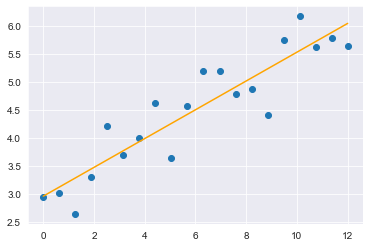

In [103]:
plt.scatter(x_train,y_train)
x=np.linspace(0,12,100)
plt.plot(x,x*0.2573+2.9550,color="orange")

### TensorFlow进行初始化，并进行运算  
### 效果图如下
![](2.jpg)